In [2]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d
from scipy.stats import linregress

from utils import *

sns.set(style="whitegrid")

model_dir = "/Users/jessica.schmilovich/Documents/GSTEM Research Project/BehavioralModel-main/Fits"
behavior_dir = "/Users/jessica.schmilovich/Documents/GSTEM Research Project/BehVar-main/Rats"

In [3]:
mat_files = sorted(glob.glob(f"{model_dir}/*.mat"))
all_rat_data = {}

for file in mat_files:
    rat = os.path.basename(file).split('.')[0]
    mat_data = load_mat_file(file)
    folds = mat_data.get('BestFit_Folds', [])

    # extract training data across all folds
    train_df = extract_train_trials(folds, rat=rat)

    # process each fold separately to add session numbers
    fold_dfs = []
    for fold_idx in range(len(folds)):
        # get training data for this specific fold
        fold_train = train_df[train_df['Fold'] == fold_idx].copy()

        # extract ntrials for this fold's training data
        ntrials = []
        if fold_idx < len(folds):
            fold_data = folds[fold_idx]
            if hasattr(fold_data.ratTrial_TrainFold, 'ntrials'):
                ntrials.extend(fold_data.ratTrial_TrainFold.ntrials.flatten())

        # add session numbers for this fold
        if len(ntrials) > 0:
            fold_train = add_session_numbers(fold_train, ntrials)
        else:
            fold_train['session'] = 1

        fold_train = fold_train.rename(columns={'session': 'session_num'})
        fold_dfs.append(fold_train)

    # combine all folds back together
    combined_df = pd.concat(fold_dfs, ignore_index=True)
    combined_df = apply_valid_trial_filter(combined_df)
    all_rat_data[rat] = combined_df
    
    reward_mapping = {4: 5, 16: 20, 32: 40, 64: 80}
    for rat, df in all_rat_data.items():
        if 'reward' in df.columns:
            df['reward'] = df['reward'].replace(reward_mapping)

In [4]:
rat_behavior_data = {}
for rat in all_rat_data.keys():
    rat_id = rat.split('_')[0]
    rat_file = os.path.join(behavior_dir, f"ratTrial_{rat_id}.mat")
    if os.path.exists(rat_file):
        df = load_behavior_data(rat_file)
        df = apply_valid_trial_filter(df)
        df['reward'] = df['reward'].replace(reward_mapping)
        rat_behavior_data[rat] = df

In [6]:
# select 10 random rats that have both model and behavioral data
common_rats = list(set(all_rat_data.keys()) & set(rat_behavior_data.keys()))
np.random.seed(42)
selected_rats = np.random.choice(common_rats, size=min(10, len(common_rats)), replace=False)

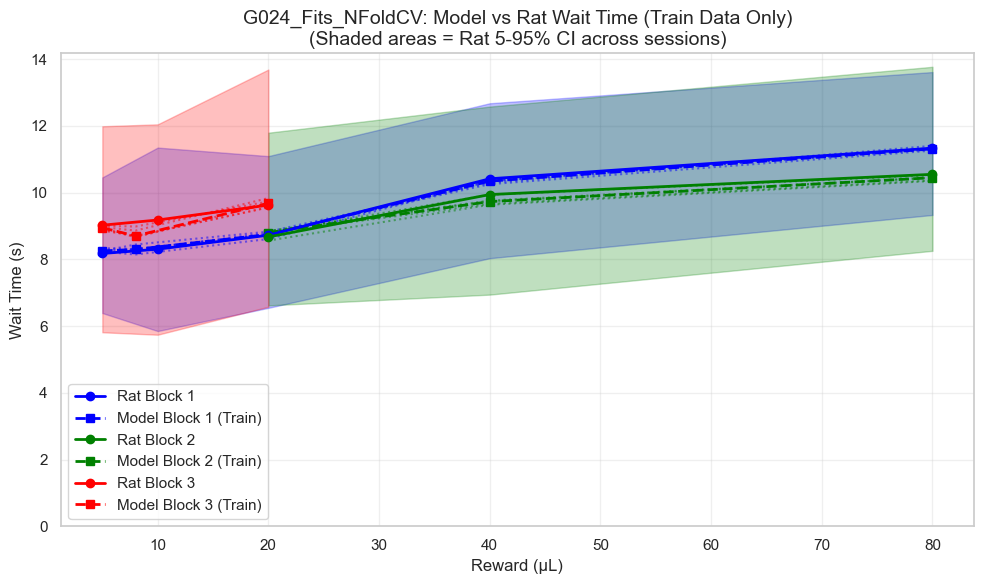


G024_Fits_NFoldCV Results:
Block 1 - Reward 5: Model=8.25, Rat=8.18 [6.39-10.46]
Block 1 - Reward 20: Model=8.75, Rat=8.73 [6.55-11.10]
Block 1 - Reward 40: Model=10.35, Rat=10.42 [8.04-12.68]
Block 1 - Reward 80: Model=11.31, Rat=11.34 [9.33-13.62]
Block 2 - Reward 20: Model=8.81, Rat=8.67 [6.62-11.80]
Block 2 - Reward 40: Model=9.73, Rat=9.94 [6.94-12.58]
Block 2 - Reward 80: Model=10.45, Rat=10.55 [8.26-13.77]
Block 3 - Reward 5: Model=8.95, Rat=9.03 [5.82-11.99]
Block 3 - Reward 20: Model=9.68, Rat=9.63 [6.58-13.69]


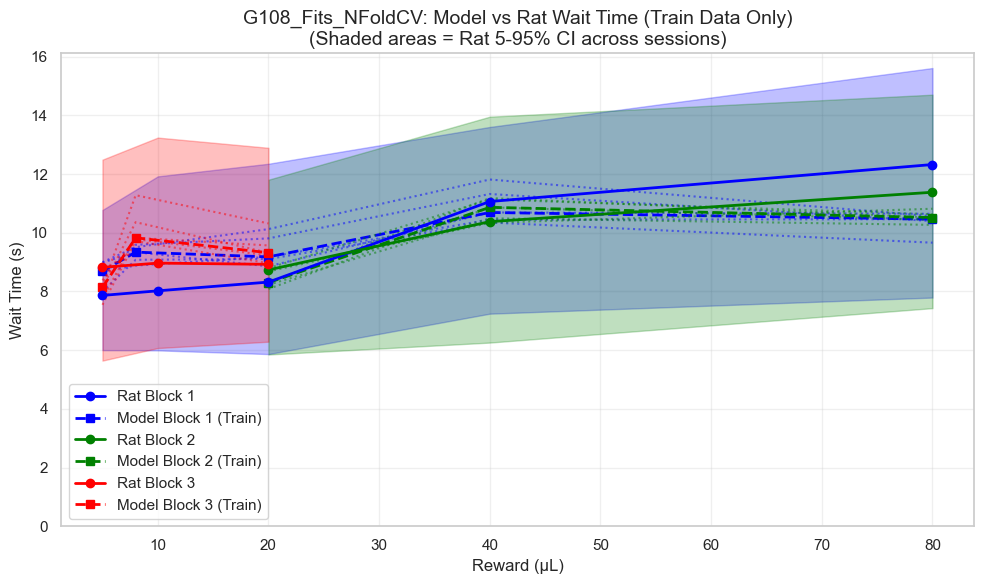


G108_Fits_NFoldCV Results:
Block 1 - Reward 5: Model=8.69, Rat=7.87 [6.00-10.78]
Block 1 - Reward 20: Model=9.18, Rat=8.32 [5.87-12.35]
Block 1 - Reward 40: Model=10.69, Rat=11.06 [7.24-13.61]
Block 1 - Reward 80: Model=10.46, Rat=12.33 [7.79-15.61]
Block 2 - Reward 20: Model=8.30, Rat=8.74 [5.85-11.81]
Block 2 - Reward 40: Model=10.87, Rat=10.38 [6.26-13.96]
Block 2 - Reward 80: Model=10.52, Rat=11.38 [7.43-14.70]
Block 3 - Reward 5: Model=8.14, Rat=8.82 [5.64-12.49]
Block 3 - Reward 20: Model=9.32, Rat=8.92 [6.29-12.89]


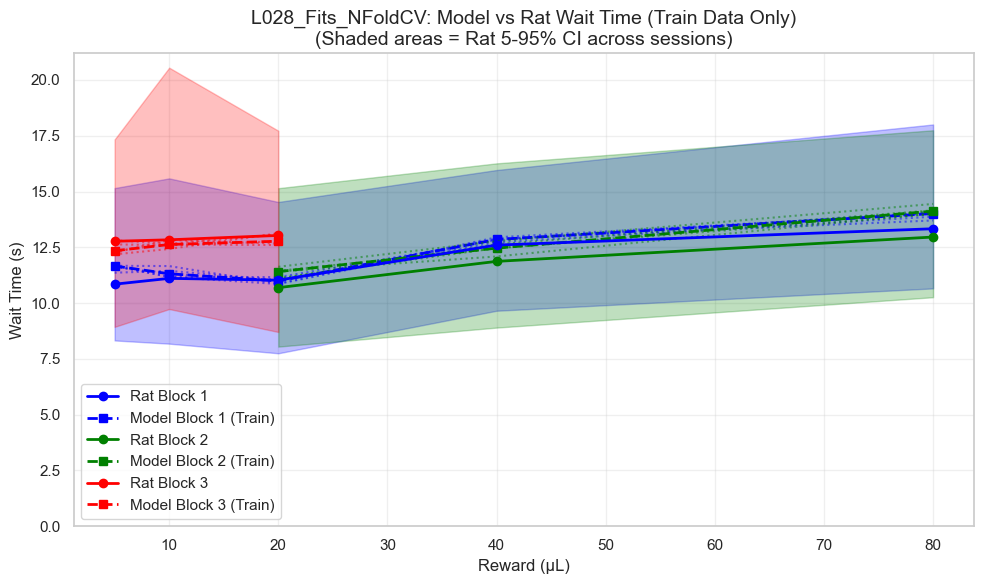


L028_Fits_NFoldCV Results:
Block 1 - Reward 5: Model=11.66, Rat=10.85 [8.33-15.15]
Block 1 - Reward 10: Model=11.31, Rat=11.11 [8.18-15.59]
Block 1 - Reward 20: Model=10.99, Rat=11.03 [7.75-14.53]
Block 1 - Reward 40: Model=12.85, Rat=12.60 [9.66-15.96]
Block 1 - Reward 80: Model=14.01, Rat=13.33 [10.66-18.00]
Block 2 - Reward 20: Model=11.41, Rat=10.69 [8.05-15.15]
Block 2 - Reward 40: Model=12.46, Rat=11.87 [8.90-16.26]
Block 2 - Reward 80: Model=14.12, Rat=12.96 [10.26-17.74]
Block 3 - Reward 5: Model=12.34, Rat=12.77 [8.93-17.33]
Block 3 - Reward 10: Model=12.63, Rat=12.84 [9.73-20.55]
Block 3 - Reward 20: Model=12.77, Rat=13.03 [8.71-17.72]


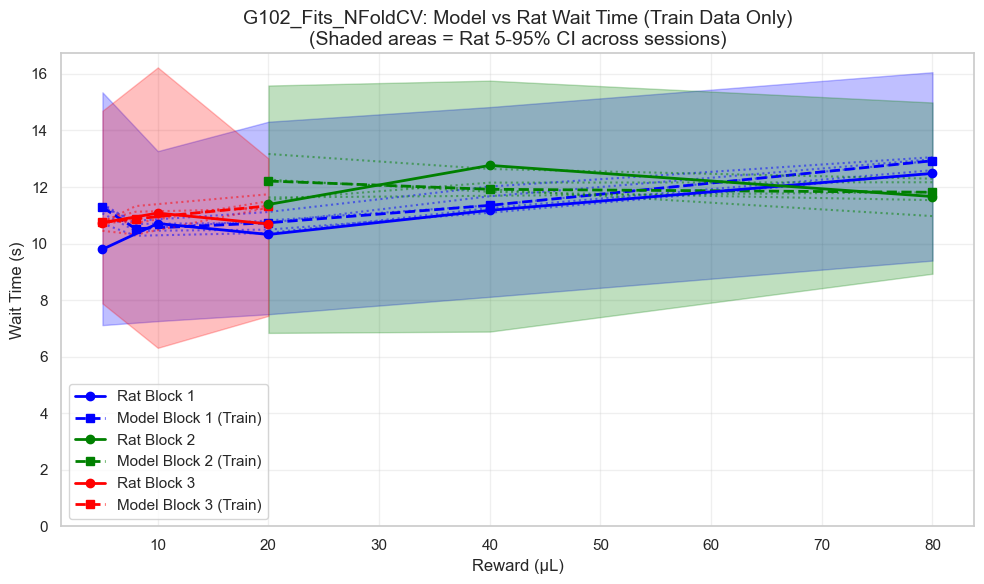


G102_Fits_NFoldCV Results:
Block 1 - Reward 5: Model=11.28, Rat=9.80 [7.11-15.35]
Block 1 - Reward 20: Model=10.73, Rat=10.32 [7.50-14.31]
Block 1 - Reward 40: Model=11.35, Rat=11.18 [8.11-14.83]
Block 1 - Reward 80: Model=12.93, Rat=12.48 [9.40-16.06]
Block 2 - Reward 20: Model=12.21, Rat=11.38 [6.84-15.59]
Block 2 - Reward 40: Model=11.92, Rat=12.76 [6.89-15.76]
Block 2 - Reward 80: Model=11.81, Rat=11.66 [8.93-14.99]
Block 3 - Reward 5: Model=10.75, Rat=10.74 [7.88-14.70]
Block 3 - Reward 20: Model=11.33, Rat=10.69 [7.44-13.01]


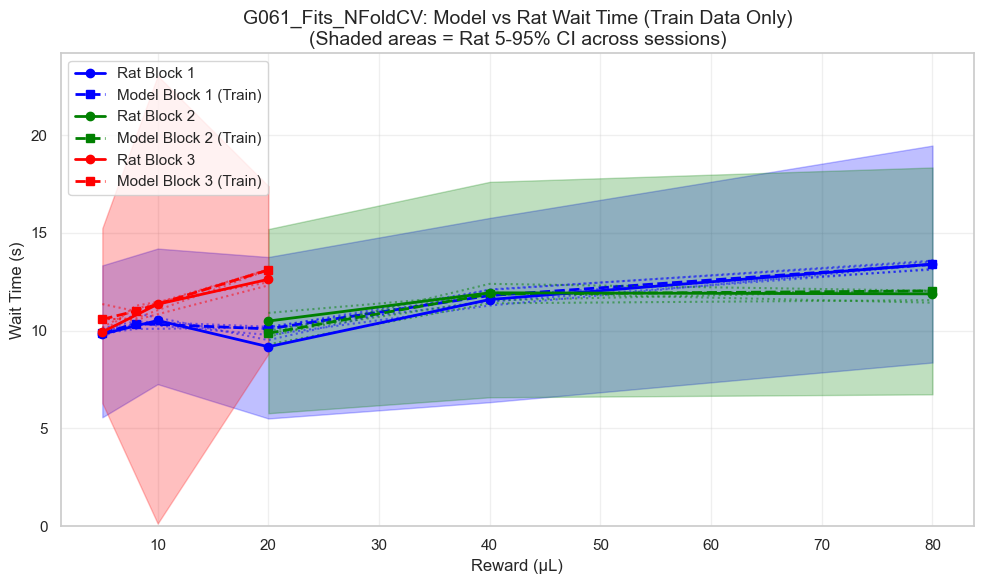


G061_Fits_NFoldCV Results:
Block 1 - Reward 5: Model=9.86, Rat=9.83 [5.57-13.34]
Block 1 - Reward 20: Model=10.09, Rat=9.18 [5.51-13.77]
Block 1 - Reward 40: Model=11.80, Rat=11.59 [6.34-15.77]
Block 1 - Reward 80: Model=13.39, Rat=13.40 [8.37-19.47]
Block 2 - Reward 20: Model=9.87, Rat=10.49 [5.78-15.20]
Block 2 - Reward 40: Model=11.87, Rat=11.94 [6.59-17.61]
Block 2 - Reward 80: Model=12.04, Rat=11.88 [6.74-18.35]
Block 3 - Reward 5: Model=10.58, Rat=9.93 [6.30-15.24]
Block 3 - Reward 20: Model=13.11, Rat=12.63 [8.81-17.39]


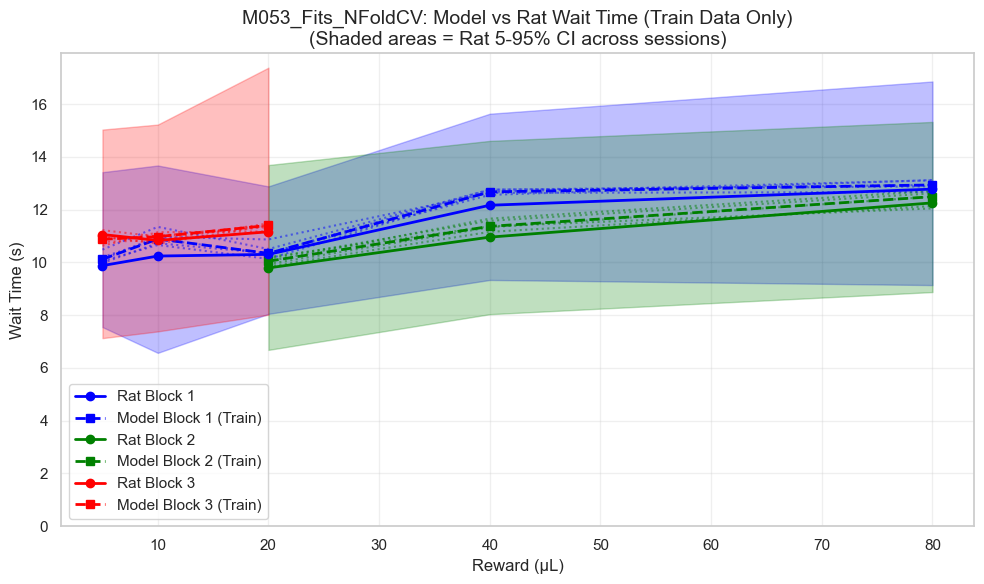


M053_Fits_NFoldCV Results:
Block 1 - Reward 5: Model=10.12, Rat=9.88 [7.55-13.42]
Block 1 - Reward 10: Model=10.89, Rat=10.24 [6.57-13.67]
Block 1 - Reward 20: Model=10.34, Rat=10.31 [8.05-12.88]
Block 1 - Reward 40: Model=12.68, Rat=12.17 [9.34-15.64]
Block 1 - Reward 80: Model=12.94, Rat=12.78 [9.14-16.86]
Block 2 - Reward 20: Model=10.05, Rat=9.79 [6.69-13.69]
Block 2 - Reward 40: Model=11.37, Rat=10.96 [8.04-14.61]
Block 2 - Reward 80: Model=12.49, Rat=12.26 [8.88-15.33]
Block 3 - Reward 5: Model=10.88, Rat=11.06 [7.13-15.04]
Block 3 - Reward 10: Model=10.98, Rat=10.83 [7.39-15.23]
Block 3 - Reward 20: Model=11.40, Rat=11.16 [8.02-17.38]


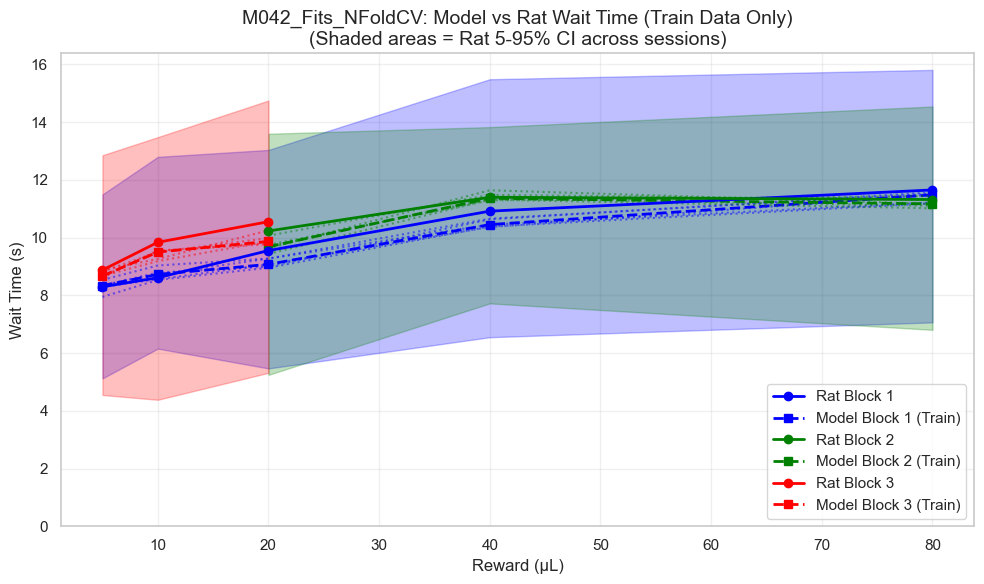


M042_Fits_NFoldCV Results:
Block 1 - Reward 5: Model=8.34, Rat=8.30 [5.12-11.50]
Block 1 - Reward 10: Model=8.73, Rat=8.61 [6.15-12.80]
Block 1 - Reward 20: Model=9.07, Rat=9.55 [5.47-13.04]
Block 1 - Reward 40: Model=10.45, Rat=10.92 [6.55-15.49]
Block 1 - Reward 80: Model=11.48, Rat=11.65 [7.06-15.81]
Block 2 - Reward 20: Model=9.68, Rat=10.23 [5.25-13.60]
Block 2 - Reward 40: Model=11.36, Rat=11.40 [7.72-13.83]
Block 2 - Reward 80: Model=11.17, Rat=11.32 [6.81-14.54]
Block 3 - Reward 5: Model=8.67, Rat=8.88 [4.55-12.85]
Block 3 - Reward 10: Model=9.50, Rat=9.84 [4.38-13.48]
Block 3 - Reward 20: Model=9.87, Rat=10.55 [5.32-14.75]


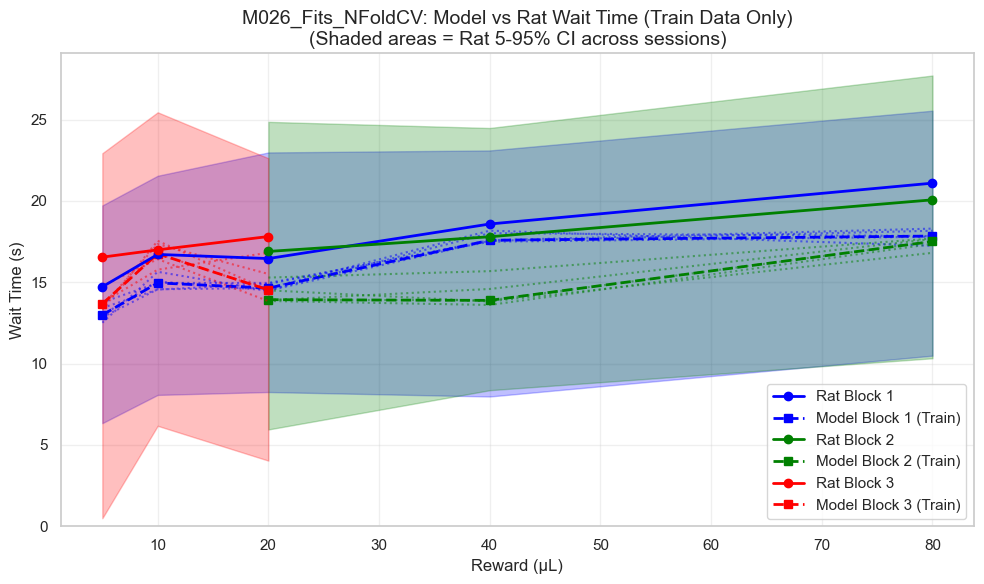


M026_Fits_NFoldCV Results:
Block 1 - Reward 5: Model=12.99, Rat=14.72 [6.34-19.72]
Block 1 - Reward 10: Model=14.96, Rat=16.71 [8.07-21.55]
Block 1 - Reward 20: Model=14.64, Rat=16.46 [8.25-22.98]
Block 1 - Reward 40: Model=17.58, Rat=18.58 [7.98-23.10]
Block 1 - Reward 80: Model=17.84, Rat=21.09 [10.49-25.55]
Block 2 - Reward 20: Model=13.93, Rat=16.89 [5.95-24.86]
Block 2 - Reward 40: Model=13.89, Rat=17.80 [8.36-24.48]
Block 2 - Reward 80: Model=17.51, Rat=20.07 [10.33-27.71]
Block 3 - Reward 5: Model=13.67, Rat=16.54 [0.49-22.93]
Block 3 - Reward 10: Model=16.75, Rat=16.99 [6.17-25.45]
Block 3 - Reward 20: Model=14.53, Rat=17.81 [4.03-22.62]


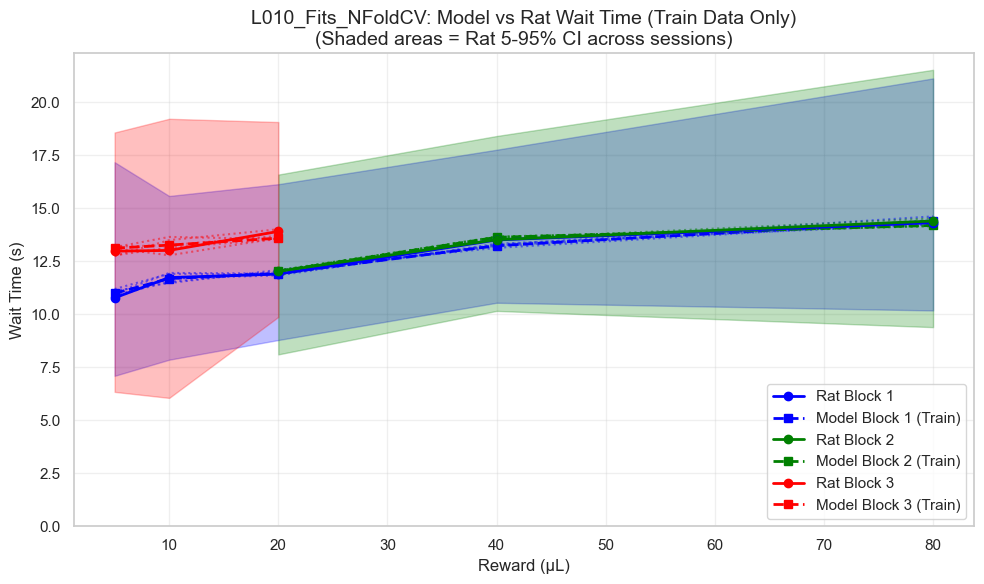


L010_Fits_NFoldCV Results:
Block 1 - Reward 5: Model=10.98, Rat=10.77 [7.09-17.17]
Block 1 - Reward 10: Model=11.68, Rat=11.73 [7.85-15.58]
Block 1 - Reward 20: Model=11.92, Rat=11.89 [8.78-16.13]
Block 1 - Reward 40: Model=13.23, Rat=13.50 [10.54-17.76]
Block 1 - Reward 80: Model=14.39, Rat=14.32 [10.18-21.12]
Block 2 - Reward 20: Model=12.03, Rat=12.02 [8.10-16.58]
Block 2 - Reward 40: Model=13.63, Rat=13.51 [10.16-18.40]
Block 2 - Reward 80: Model=14.19, Rat=14.39 [9.39-21.53]
Block 3 - Reward 5: Model=13.11, Rat=12.97 [6.34-18.57]
Block 3 - Reward 10: Model=13.26, Rat=13.01 [6.05-19.22]
Block 3 - Reward 20: Model=13.59, Rat=13.90 [9.87-19.06]


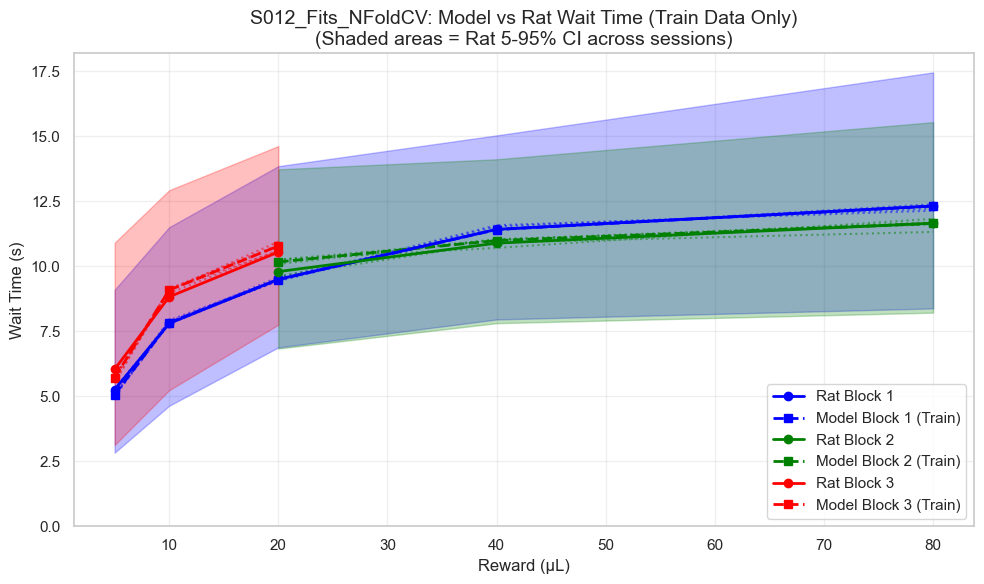


S012_Fits_NFoldCV Results:
Block 1 - Reward 5: Model=5.06, Rat=5.26 [2.83-9.10]
Block 1 - Reward 10: Model=7.83, Rat=7.80 [4.64-11.51]
Block 1 - Reward 20: Model=9.49, Rat=9.50 [6.88-13.85]
Block 1 - Reward 40: Model=11.42, Rat=11.42 [7.96-15.04]
Block 1 - Reward 80: Model=12.32, Rat=12.32 [8.38-17.46]
Block 2 - Reward 20: Model=10.17, Rat=9.80 [6.84-13.73]
Block 2 - Reward 40: Model=10.99, Rat=10.89 [7.81-14.12]
Block 2 - Reward 80: Model=11.65, Rat=11.66 [8.22-15.55]
Block 3 - Reward 5: Model=5.71, Rat=6.04 [3.12-10.91]
Block 3 - Reward 10: Model=9.09, Rat=8.83 [5.23-12.93]
Block 3 - Reward 20: Model=10.78, Rat=10.55 [7.75-14.63]


In [24]:
for rat in selected_rats:
    # get behavioral data for this rat
    rat_df = rat_behavior_data[rat]
    rat_sessions = rat_df.groupby(['session_num', 'reward', 'block'])['wait_time'].mean().reset_index()
    
    # calculate stats across sessions for this rat
    rat_stats = rat_sessions.groupby(['reward', 'block'])['wait_time'].agg([
        ('median', 'median'),
        ('p5', lambda x: np.percentile(x, 5)),
        ('p95', lambda x: np.percentile(x, 95))
    ]).reset_index()
    
    # get model data for this rat
    model_df = all_rat_data[rat]
    model_folds = model_df.groupby(['Fold', 'reward', 'block'])['wait_time'].mean().reset_index()
    
    # calculate median across folds for this rat
    model_stats = model_folds.groupby(['reward', 'block'])['wait_time'].median().reset_index()
    model_stats.columns = ['reward', 'block', 'median']
    
    # create plot for this rat
    fig, ax = plt.subplots(figsize=(10, 6))
    
    blocks = sorted(rat_stats['block'].unique())
    colors = ['blue', 'green', 'red']
    block_colors = dict(zip(blocks, colors[:len(blocks)]))
    
    for block in blocks:
        color = block_colors[block]
        
        # get data for this block
        rat_data = rat_stats[rat_stats['block'] == block].sort_values('reward')
        model_data = model_stats[model_stats['block'] == block].sort_values('reward')
        
        # plot rat median with CI
        ax.plot(rat_data['reward'], rat_data['median'], 
                color=color, linewidth=2, marker='o', markersize=6,
                label=f'Rat Block {block}', zorder=3)
        
        # plot confidence interval as shaded area
        ax.fill_between(rat_data['reward'], 
                        rat_data['p5'], 
                        rat_data['p95'], 
                        alpha=0.25, color=color, zorder=1)
        
        # plot model median
        ax.plot(model_data['reward'], model_data['median'], 
                color=color, linewidth=2, marker='s', markersize=6,
                linestyle='--', 
                label=f'Model Block {block} (Train)', zorder=2)
        
        fold_data = model_folds[model_folds['block'] == block]
        for i, fold in enumerate(sorted(fold_data['Fold'].unique())):
            fold_specific = fold_data[fold_data['Fold'] == fold].sort_values('reward')
            ax.plot(fold_specific['reward'], fold_specific['wait_time'], 
                    color=color, linewidth=1.5, linestyle=':', alpha=0.5)
    
    ax.set_xlabel('Reward (μL)', fontsize=12)
    ax.set_ylabel('Wait Time (s)', fontsize=12)
    ax.set_title(f'{rat}: Model vs Rat Wait Time (Train Data Only)\n(Shaded areas = Rat 5-95% CI across sessions)', fontsize=14)
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim(bottom=0)
    
    plt.tight_layout()
    plt.show()
    
    # calculate and print statistics for this rat
    print(f"\n{rat} Results:")
    for block in blocks:
        rat_block = rat_stats[rat_stats['block'] == block]
        model_block = model_stats[model_stats['block'] == block]
        
        for reward in rat_block['reward'].unique():
            if reward in model_block['reward'].values:
                rat_row = rat_block[rat_block['reward'] == reward].iloc[0]
                model_row = model_block[model_block['reward'] == reward].iloc[0]
                
                within_ci = rat_row['p5'] <= model_row['median'] <= rat_row['p95']
                
                print(f"Block {block} - Reward {reward}: "
                      f"Model={model_row['median']:.2f}, "
                      f"Rat={rat_row['median']:.2f} [{rat_row['p5']:.2f}-{rat_row['p95']:.2f}]")

In [10]:
mat_files = sorted(glob.glob(f"{model_dir}/*.mat"))
all_rat_data_combined = {}

for file in mat_files:
    rat = os.path.basename(file).split('.')[0]
    mat_data = load_mat_file(file)
    folds = mat_data.get('BestFit_Folds', [])

    # extract training and test data
    train_df = extract_train_trials(folds, rat=rat)
    test_df = extract_test_trials(folds, rat=rat)

    # process each fold separately to add session numbers
    fold_dfs = []
    for fold_idx in range(len(folds)):
        # get training and test data for this specific fold
        fold_train = train_df[train_df['Fold'] == fold_idx].copy()
        fold_test = test_df[test_df['Fold'] == fold_idx].copy()

        # extract ntrials for this fold
        ntrials = []
        if fold_idx < len(folds):
            fold_data = folds[fold_idx]
            if hasattr(fold_data.ratTrial_TrainFold, 'ntrials'):
                ntrials.extend(fold_data.ratTrial_TrainFold.ntrials.flatten())
            if hasattr(fold_data.ratTrial_TestFold, 'ntrials'):
                ntrials.extend(fold_data.ratTrial_TestFold.ntrials.flatten())

        # combine train and test for this fold
        fold_combined = pd.concat([fold_train, fold_test], ignore_index=True)
        
        # add session numbers
        if len(ntrials) > 0:
            fold_combined = add_session_numbers(fold_combined, ntrials)
        else:
            fold_combined['session'] = 1

        fold_combined = fold_combined.rename(columns={'session': 'session_num'})
        fold_dfs.append(fold_combined)

    # combine all folds back together
    combined_df = pd.concat(fold_dfs, ignore_index=True)
    combined_df = apply_valid_trial_filter(combined_df)
    all_rat_data_combined[rat] = combined_df
    
    # apply reward mapping
    reward_mapping = {4: 5, 16: 20, 32: 40, 64: 80}
    for rat, df in all_rat_data_combined.items():
        if 'reward' in df.columns:
            df['reward'] = df['reward'].replace(reward_mapping)

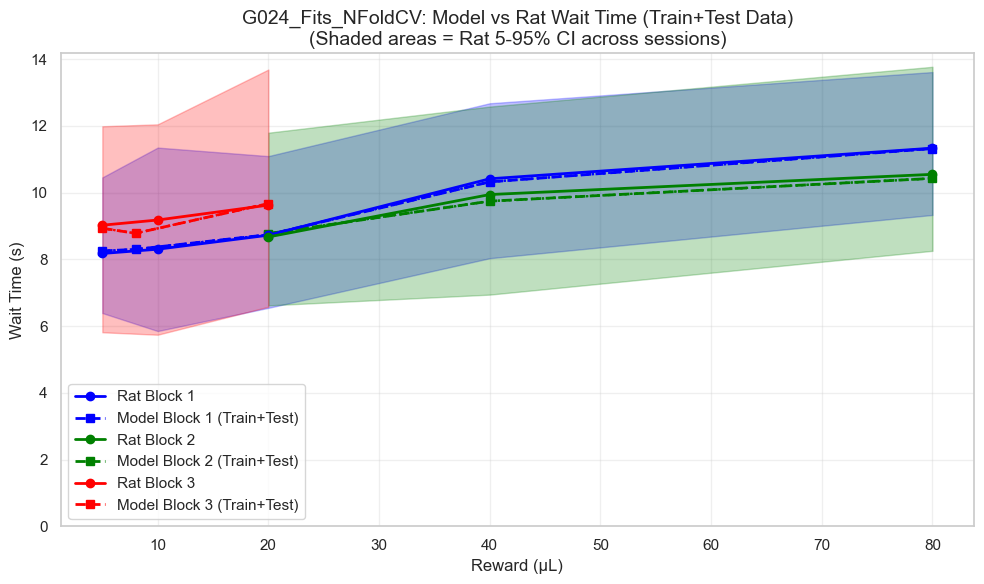


G024_Fits_NFoldCV Results (Train+Test):
Block 1 - Reward 5: Model=8.25, Rat=8.18 [6.39-10.46]
Block 1 - Reward 20: Model=8.74, Rat=8.73 [6.55-11.10]
Block 1 - Reward 40: Model=10.32, Rat=10.42 [8.04-12.68]
Block 1 - Reward 80: Model=11.32, Rat=11.34 [9.33-13.62]
Block 2 - Reward 20: Model=8.77, Rat=8.67 [6.62-11.80]
Block 2 - Reward 40: Model=9.75, Rat=9.94 [6.94-12.58]
Block 2 - Reward 80: Model=10.43, Rat=10.55 [8.26-13.77]
Block 3 - Reward 5: Model=8.93, Rat=9.03 [5.82-11.99]
Block 3 - Reward 20: Model=9.67, Rat=9.63 [6.58-13.69]


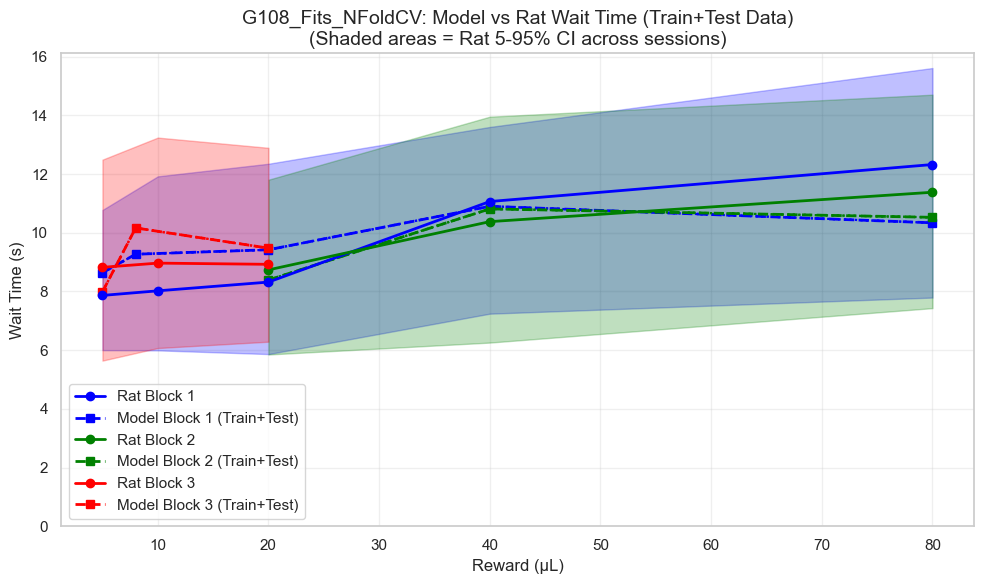


G108_Fits_NFoldCV Results (Train+Test):
Block 1 - Reward 5: Model=8.64, Rat=7.87 [6.00-10.78]
Block 1 - Reward 20: Model=9.42, Rat=8.32 [5.87-12.35]
Block 1 - Reward 40: Model=10.90, Rat=11.06 [7.24-13.61]
Block 1 - Reward 80: Model=10.34, Rat=12.33 [7.79-15.61]
Block 2 - Reward 20: Model=8.39, Rat=8.74 [5.85-11.81]
Block 2 - Reward 40: Model=10.81, Rat=10.38 [6.26-13.96]
Block 2 - Reward 80: Model=10.53, Rat=11.38 [7.43-14.70]
Block 3 - Reward 5: Model=7.99, Rat=8.82 [5.64-12.49]
Block 3 - Reward 20: Model=9.48, Rat=8.92 [6.29-12.89]


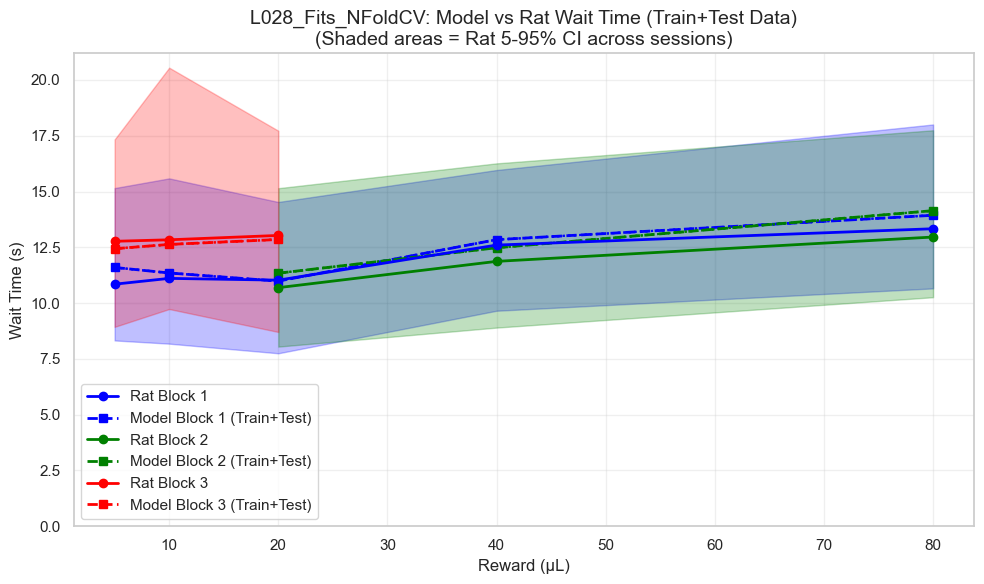


L028_Fits_NFoldCV Results (Train+Test):
Block 1 - Reward 5: Model=11.60, Rat=10.85 [8.33-15.15]
Block 1 - Reward 10: Model=11.35, Rat=11.11 [8.18-15.59]
Block 1 - Reward 20: Model=10.98, Rat=11.03 [7.75-14.53]
Block 1 - Reward 40: Model=12.84, Rat=12.60 [9.66-15.96]
Block 1 - Reward 80: Model=13.93, Rat=13.33 [10.66-18.00]
Block 2 - Reward 20: Model=11.34, Rat=10.69 [8.05-15.15]
Block 2 - Reward 40: Model=12.48, Rat=11.87 [8.90-16.26]
Block 2 - Reward 80: Model=14.14, Rat=12.96 [10.26-17.74]
Block 3 - Reward 5: Model=12.44, Rat=12.77 [8.93-17.33]
Block 3 - Reward 10: Model=12.63, Rat=12.84 [9.73-20.55]
Block 3 - Reward 20: Model=12.85, Rat=13.03 [8.71-17.72]


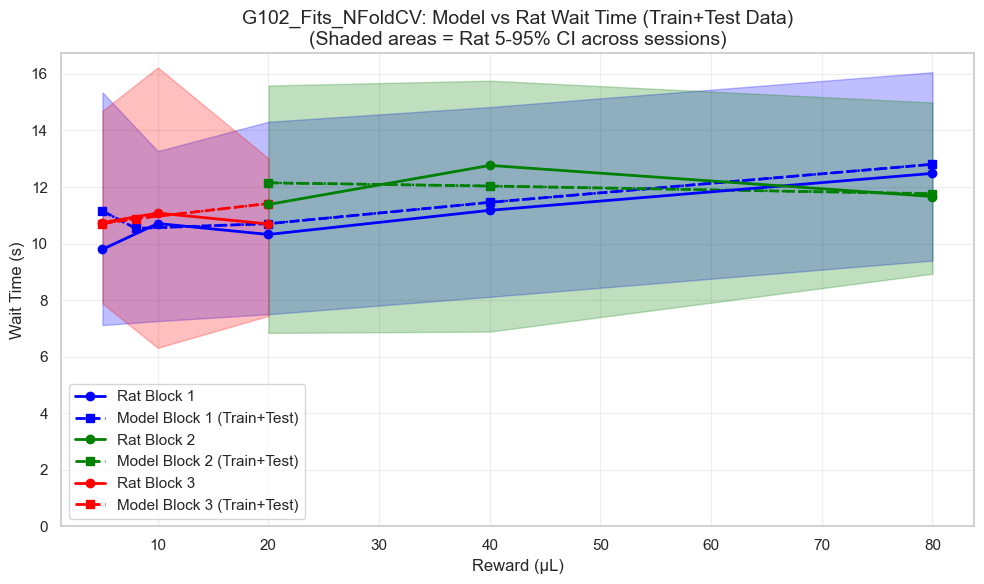


G102_Fits_NFoldCV Results (Train+Test):
Block 1 - Reward 5: Model=11.15, Rat=9.80 [7.11-15.35]
Block 1 - Reward 20: Model=10.70, Rat=10.32 [7.50-14.31]
Block 1 - Reward 40: Model=11.46, Rat=11.18 [8.11-14.83]
Block 1 - Reward 80: Model=12.80, Rat=12.48 [9.40-16.06]
Block 2 - Reward 20: Model=12.15, Rat=11.38 [6.84-15.59]
Block 2 - Reward 40: Model=12.04, Rat=12.76 [6.89-15.76]
Block 2 - Reward 80: Model=11.76, Rat=11.66 [8.93-14.99]
Block 3 - Reward 5: Model=10.71, Rat=10.74 [7.88-14.70]
Block 3 - Reward 20: Model=11.42, Rat=10.69 [7.44-13.01]


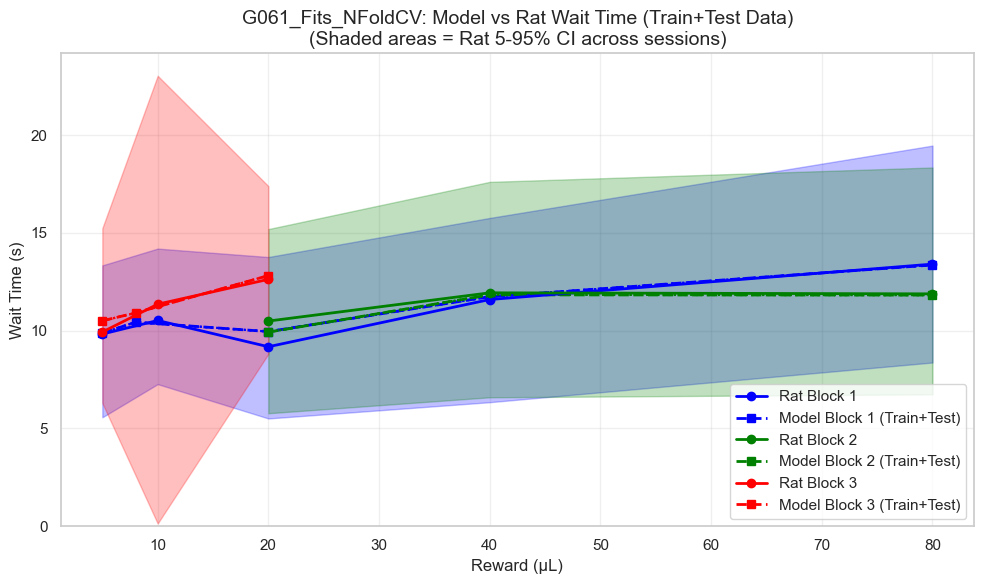


G061_Fits_NFoldCV Results (Train+Test):
Block 1 - Reward 5: Model=9.87, Rat=9.83 [5.57-13.34]
Block 1 - Reward 20: Model=9.96, Rat=9.18 [5.51-13.77]
Block 1 - Reward 40: Model=11.74, Rat=11.59 [6.34-15.77]
Block 1 - Reward 80: Model=13.36, Rat=13.40 [8.37-19.47]
Block 2 - Reward 20: Model=9.93, Rat=10.49 [5.78-15.20]
Block 2 - Reward 40: Model=11.83, Rat=11.94 [6.59-17.61]
Block 2 - Reward 80: Model=11.82, Rat=11.88 [6.74-18.35]
Block 3 - Reward 5: Model=10.51, Rat=9.93 [6.30-15.24]
Block 3 - Reward 20: Model=12.82, Rat=12.63 [8.81-17.39]


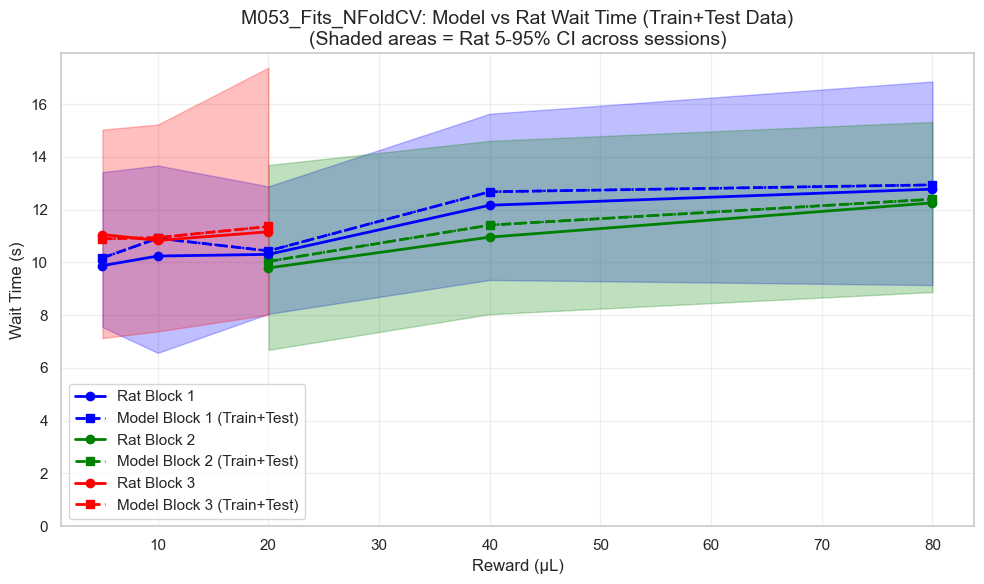


M053_Fits_NFoldCV Results (Train+Test):
Block 1 - Reward 5: Model=10.17, Rat=9.88 [7.55-13.42]
Block 1 - Reward 10: Model=10.92, Rat=10.24 [6.57-13.67]
Block 1 - Reward 20: Model=10.44, Rat=10.31 [8.05-12.88]
Block 1 - Reward 40: Model=12.68, Rat=12.17 [9.34-15.64]
Block 1 - Reward 80: Model=12.94, Rat=12.78 [9.14-16.86]
Block 2 - Reward 20: Model=10.04, Rat=9.79 [6.69-13.69]
Block 2 - Reward 40: Model=11.42, Rat=10.96 [8.04-14.61]
Block 2 - Reward 80: Model=12.40, Rat=12.26 [8.88-15.33]
Block 3 - Reward 5: Model=10.89, Rat=11.06 [7.13-15.04]
Block 3 - Reward 10: Model=10.94, Rat=10.83 [7.39-15.23]
Block 3 - Reward 20: Model=11.36, Rat=11.16 [8.02-17.38]


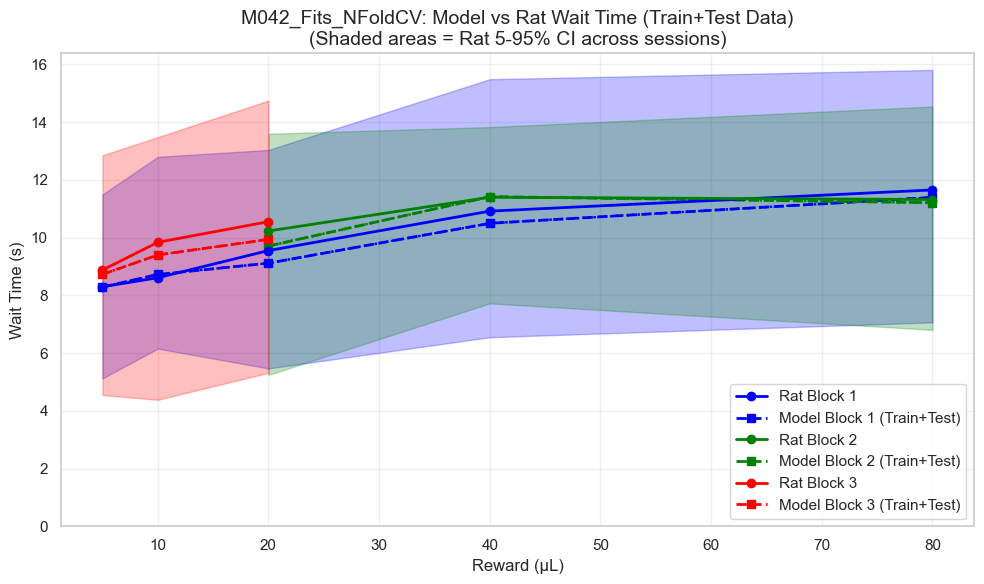


M042_Fits_NFoldCV Results (Train+Test):
Block 1 - Reward 5: Model=8.29, Rat=8.30 [5.12-11.50]
Block 1 - Reward 10: Model=8.72, Rat=8.61 [6.15-12.80]
Block 1 - Reward 20: Model=9.12, Rat=9.55 [5.47-13.04]
Block 1 - Reward 40: Model=10.50, Rat=10.92 [6.55-15.49]
Block 1 - Reward 80: Model=11.40, Rat=11.65 [7.06-15.81]
Block 2 - Reward 20: Model=9.71, Rat=10.23 [5.25-13.60]
Block 2 - Reward 40: Model=11.42, Rat=11.40 [7.72-13.83]
Block 2 - Reward 80: Model=11.21, Rat=11.32 [6.81-14.54]
Block 3 - Reward 5: Model=8.73, Rat=8.88 [4.55-12.85]
Block 3 - Reward 10: Model=9.40, Rat=9.84 [4.38-13.48]
Block 3 - Reward 20: Model=9.94, Rat=10.55 [5.32-14.75]


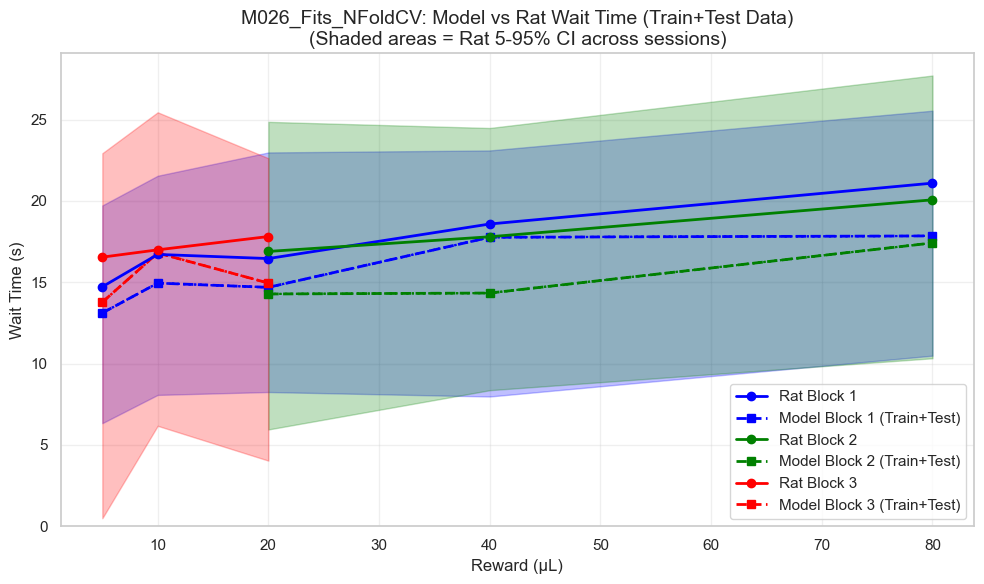


M026_Fits_NFoldCV Results (Train+Test):
Block 1 - Reward 5: Model=13.11, Rat=14.72 [6.34-19.72]
Block 1 - Reward 10: Model=14.95, Rat=16.71 [8.07-21.55]
Block 1 - Reward 20: Model=14.69, Rat=16.46 [8.25-22.98]
Block 1 - Reward 40: Model=17.76, Rat=18.58 [7.98-23.10]
Block 1 - Reward 80: Model=17.85, Rat=21.09 [10.49-25.55]
Block 2 - Reward 20: Model=14.28, Rat=16.89 [5.95-24.86]
Block 2 - Reward 40: Model=14.34, Rat=17.80 [8.36-24.48]
Block 2 - Reward 80: Model=17.42, Rat=20.07 [10.33-27.71]
Block 3 - Reward 5: Model=13.78, Rat=16.54 [0.49-22.93]
Block 3 - Reward 10: Model=16.80, Rat=16.99 [6.17-25.45]
Block 3 - Reward 20: Model=14.95, Rat=17.81 [4.03-22.62]


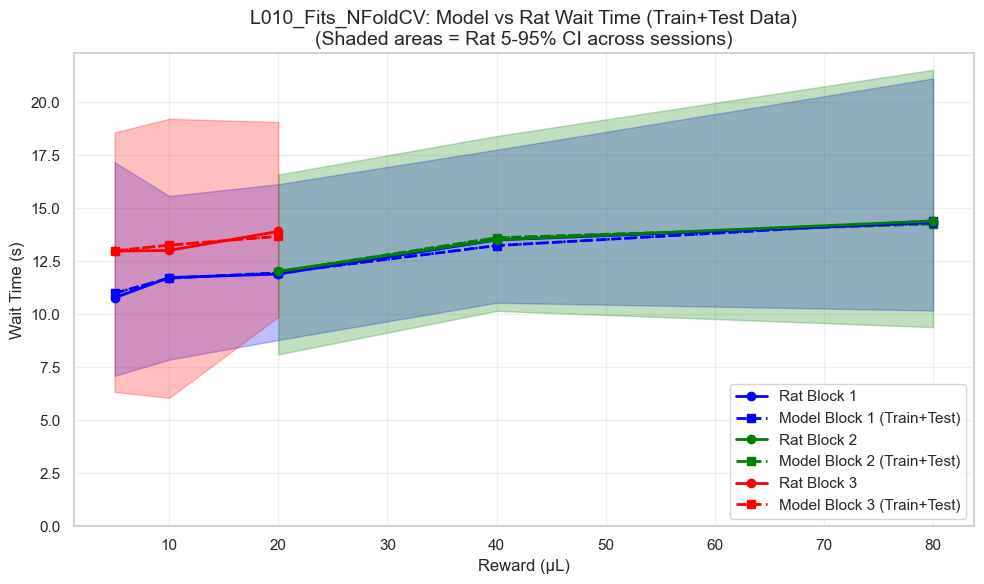


L010_Fits_NFoldCV Results (Train+Test):
Block 1 - Reward 5: Model=10.99, Rat=10.77 [7.09-17.17]
Block 1 - Reward 10: Model=11.70, Rat=11.73 [7.85-15.58]
Block 1 - Reward 20: Model=11.95, Rat=11.89 [8.78-16.13]
Block 1 - Reward 40: Model=13.23, Rat=13.50 [10.54-17.76]
Block 1 - Reward 80: Model=14.40, Rat=14.32 [10.18-21.12]
Block 2 - Reward 20: Model=12.00, Rat=12.02 [8.10-16.58]
Block 2 - Reward 40: Model=13.61, Rat=13.51 [10.16-18.40]
Block 2 - Reward 80: Model=14.26, Rat=14.39 [9.39-21.53]
Block 3 - Reward 5: Model=12.99, Rat=12.97 [6.34-18.57]
Block 3 - Reward 10: Model=13.26, Rat=13.01 [6.05-19.22]
Block 3 - Reward 20: Model=13.67, Rat=13.90 [9.87-19.06]


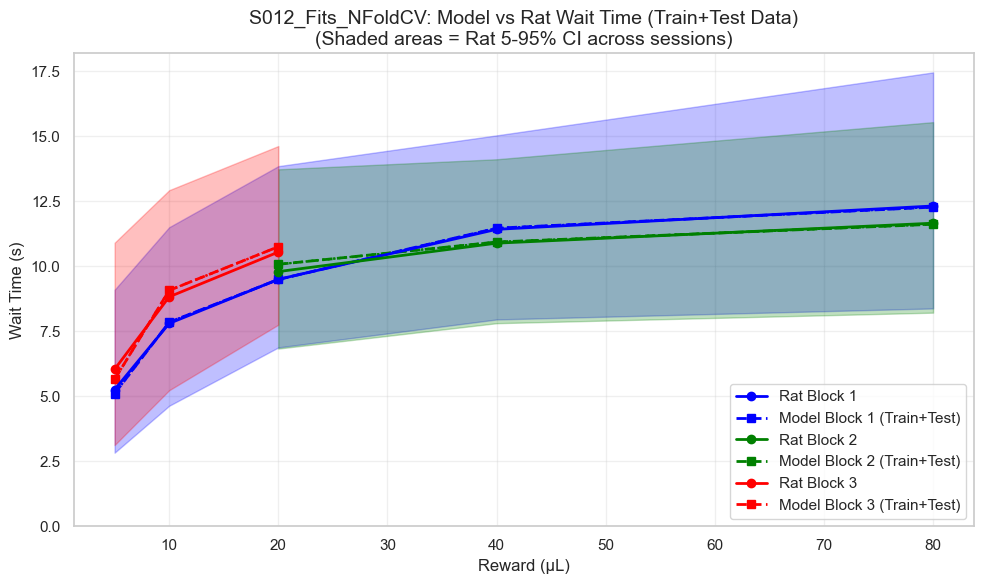


S012_Fits_NFoldCV Results (Train+Test):
Block 1 - Reward 5: Model=5.11, Rat=5.26 [2.83-9.10]
Block 1 - Reward 10: Model=7.85, Rat=7.80 [4.64-11.51]
Block 1 - Reward 20: Model=9.49, Rat=9.50 [6.88-13.85]
Block 1 - Reward 40: Model=11.47, Rat=11.42 [7.96-15.04]
Block 1 - Reward 80: Model=12.28, Rat=12.32 [8.38-17.46]
Block 2 - Reward 20: Model=10.08, Rat=9.80 [6.84-13.73]
Block 2 - Reward 40: Model=10.94, Rat=10.89 [7.81-14.12]
Block 2 - Reward 80: Model=11.62, Rat=11.66 [8.22-15.55]
Block 3 - Reward 5: Model=5.65, Rat=6.04 [3.12-10.91]
Block 3 - Reward 10: Model=9.08, Rat=8.83 [5.23-12.93]
Block 3 - Reward 20: Model=10.76, Rat=10.55 [7.75-14.63]


In [22]:
for rat in selected_rats:
    # get behavioral data for this rat
    rat_df = rat_behavior_data[rat]
    rat_sessions = rat_df.groupby(['session_num', 'reward', 'block'])['wait_time'].mean().reset_index()
    
    # calculate stats across sessions for this rat
    rat_stats = rat_sessions.groupby(['reward', 'block'])['wait_time'].agg([
        ('median', 'median'),
        ('p5', lambda x: np.percentile(x, 5)),
        ('p95', lambda x: np.percentile(x, 95))
    ]).reset_index()
    
    # get model data for this rat (now using train+test)
    model_df = all_rat_data_combined[rat]
    model_folds = model_df.groupby(['Fold', 'reward', 'block'])['wait_time'].mean().reset_index()
    
    # calculate median across folds for this rat
    model_stats = model_folds.groupby(['reward', 'block'])['wait_time'].median().reset_index()
    model_stats.columns = ['reward', 'block', 'median']
    
    # create plot for this rat
    fig, ax = plt.subplots(figsize=(10, 6))
    
    blocks = sorted(rat_stats['block'].unique())
    colors = ['blue', 'green', 'red']
    block_colors = dict(zip(blocks, colors[:len(blocks)]))
    
    for block in blocks:
        color = block_colors[block]
        
        # get data for this block
        rat_data = rat_stats[rat_stats['block'] == block].sort_values('reward')
        model_data = model_stats[model_stats['block'] == block].sort_values('reward')
        
        # plot rat median with CI
        ax.plot(rat_data['reward'], rat_data['median'], 
                color=color, linewidth=2, marker='o', markersize=6,
                label=f'Rat Block {block}', zorder=3)
        
        # plot confidence interval as shaded area
        ax.fill_between(rat_data['reward'], 
                        rat_data['p5'], 
                        rat_data['p95'], 
                        alpha=0.25, color=color, zorder=1)
        
        # plot model median (train+test)
        ax.plot(model_data['reward'], model_data['median'], 
                color=color, linewidth=2, marker='s', markersize=6,
                linestyle='--', 
                label=f'Model Block {block} (Train+Test)', zorder=2)
        
        fold_data = model_folds[model_folds['block'] == block]
        for i, fold in enumerate(sorted(fold_data['Fold'].unique())):
            fold_specific = fold_data[fold_data['Fold'] == fold].sort_values('reward')
            ax.plot(fold_specific['reward'], fold_specific['wait_time'], 
                    color=color, linewidth=1.5, linestyle=':', alpha=0.5)
    
    ax.set_xlabel('Reward (μL)', fontsize=12)
    ax.set_ylabel('Wait Time (s)', fontsize=12)
    ax.set_title(f'{rat}: Model vs Rat Wait Time (Train+Test Data)\n(Shaded areas = Rat 5-95% CI across sessions)', fontsize=14)
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim(bottom=0)
    
    plt.tight_layout()
    plt.show()
    
    # calculate and print statistics for this rat
    print(f"\n{rat} Results (Train+Test):")
    for block in blocks:
        rat_block = rat_stats[rat_stats['block'] == block]
        model_block = model_stats[model_stats['block'] == block]
        
        for reward in rat_block['reward'].unique():
            if reward in model_block['reward'].values:
                rat_row = rat_block[rat_block['reward'] == reward].iloc[0]
                model_row = model_block[model_block['reward'] == reward].iloc[0]
                
                within_ci = rat_row['p5'] <= model_row['median'] <= rat_row['p95']
                
                print(f"Block {block} - Reward {reward}: "
                      f"Model={model_row['median']:.2f}, "
                      f"Rat={rat_row['median']:.2f} [{rat_row['p5']:.2f}-{rat_row['p95']:.2f}]")